# Analityka i eksploracja danych 

## Data Minging - filtracja spamu

### Autor: Łukasz Broll, 225972
### Prowadzący: Dr hab. inż. Henryk Maciejewski

30 stycznia 2020

## 1. Cel pracy

Głównym celem pracy było zaimplementowanie i wytrenowanie klasyfikatora do analizy atrybutów wiadomości pod kątem wiadomości zawierającej SPAM.

## 2. Zakres pracy

Proces realizacji projektu mozna podzielić na następujące części:

    Analiza - przygotowanie teoretyczne do zrozumienia problemu i przegląd podobnych rozwiązań.
    Implementacja - przetowrzenie zbioru danych, utworzenie kodu źródłowego klasyfikatorów i ocena ich jakości.
    
## 3. Narzędzia i technologie

### 3.1 Oprogramowanie

    1) Jupyter - do wizualnego przedstawienia wyników implementacji
    2) Visual Studio Code - środowisko programistyczne
    3) Github - wersjonowanie kodu źródłwego
    4) Python 3 - język programowania
    
### 3.2 Biblioteki 

    1) Pandas - biblioteka do przetwarzania zbiorów danych
    2) Tensorflow, keras - modelowanie sztucznych sieci neuronowych
    3) sklearn - tworzenie modeli, korzystanie z gotowych klasyfikatorów
    
## 4. Algorytmy

 - Klasyfikator MLP (Multilayer Perceptron) - gotowy model sztucznej sieci neuronowej 
 - Sztuczna sieć neuronowa - ręczna implementacja modelu sieci neuronowej
 - Support Vector Machines - nadzorowany algorytm uczenia maszynowego w przestrzeni n-wymiarowej. 
     W testach uwzględniono następujące rodzaje kerneli:
 
    - Domyślny kernel
    - Liniowy kernel
    - Kernel radialnej funkcji bazowej
    - Kernel wielomianowy
 
## 5. Implementacja

### 5.1 Przygotowanie danych

Importowanie bibliotek

In [1]:
#!/usr/bin/env python3
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline 
import seaborn as sns

Przetwarzanie zbioru danych:
    - importowanie
    - wyznaczenie kolumny klas 'target'
    - konwersja klas na wartości binarne

In [2]:
df = pd.read_csv('dane_dm/spam.dat')
print(df.info())
print(df['target'].value_counts())
properties = list(df.columns.values)
properties.remove('target')
X = df[properties]
Y = df['target']
y = Y.replace(to_replace=['no', 'yes'], value=[0, 1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Columns: 463 entries, ACT_NOW to target
dtypes: int64(462), object(1)
memory usage: 16.9+ MB
None
no     2949
yes    1840
Name: target, dtype: int64


Podzielenie zbioru na testujący i trenujący

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 5.2 ANN

Zbudowanie modelu z jedną warstwą Flatten i dwoma Dense, funkcja aktywacji ReLu

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(462,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.relu),
])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 462)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               59264     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 59,393
Trainable params: 59,393
Non-trainable params: 0
_________________________________________________________________


Kompilacja i trenowanie modelu w 10. epokach i batch_size = 32, optymalizator adams

In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=12, batch_size=64)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/12
3831/3831 [==============================] - 2s 406us/sample - loss: 0.2576 - acc: 0.9120
Epoch 2/12
3831/3831 [==============================] - 1s 206us/sample - loss: 0.0837 - acc: 0.9721
Epoch 3/12
3831/3831 [==============================] - 1s 215us/sample - loss: 0.0637 - acc: 0.9851
Epoch 4/12
3831/3831 [==============================] - 1s 188us/sample - loss: 0.0511 - acc: 0.9880
Epoch 5/12
3831/3831 [==============================] - 1s 196us/sample - loss: 0.0500 - acc: 0.9898
Epoch 6/12
3831/3831 [==============================] - 1s 203us/sample - loss: 0.0411 - acc: 0.9903
Epoch 7/12
3831/3831 [==============================] - 1s 193us/sample - loss: 0.0361 - acc: 0.9911
Epoch 8/12
3831/3831 [==============================] - 1s 218us/sample - loss: 0.0331 - acc: 0.9914
Epoch 9/12
3831/3831 [==============================] - 1s 202us/sample - loss: 0.0313 - acc: 0.99

Zmiana funkcji aktywacji na sigmoid

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(462,)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=12, batch_size=64)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 462)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               59264     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 59,393
Trainable params: 59,393
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
3831/3831 [==============================] - 1s 244us/sample - loss: 0.4533 - acc: 0.8243
Epoch 2/12
3831/3831 [==============================] - 1s 207us/sample - loss: 0.2239 - acc: 0.9441
Epoch 3/12
3831/3831 [==============================] - 1s 210us/sample - loss: 0.1432 - acc: 0.9603
Epoch 4/12
3831/3831 [==============================] - ETA: 0s - loss: 0.107

Dodanie drugiej wartstwy Dense

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(462,)),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=12, batch_size=64)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 462)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               59264     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 75,905
Trainable params: 75,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
3831/3831 [==============================] - 1s 310us/sample - loss: 0.5904 - acc: 0.6724
Epoch 2/12
3831/3831 [==============================] - 1s 255us/sample - loss: 0.2557 - acc: 0.9368
Epoch 3/12
3831/3831 [========================

Zmiana funkcji aktywacji na Relu oprócz ostatniej warstwy

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(462,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=12, batch_size=64)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 462)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               59264     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 75,905
Trainable params: 75,905
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
3831/3831 [==============================] - 1s 352us/sample - loss: 0.2722 - acc: 0.9379
Epoch 2/12
3831/3831 [==============================] - 1s 273us/sample - loss: 0.0508 - acc: 0.9854s - loss: 0.056
Epoch 3/12
3831/3831 [=========

### 5.3 MLP

Utworzenie klasyfikatora MLP o wymiarze warstwy ukrytej 10x10x10, liczbie iteracji = 10

In [9]:
clf = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=10, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

Trenowanie klasyfikatora i przedstawienie jakości

In [10]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

Iteration 1, loss = 0.71123116
Iteration 2, loss = 0.70311845
Iteration 3, loss = 0.69511304
Iteration 4, loss = 0.68799993
Iteration 5, loss = 0.68213501
Iteration 6, loss = 0.67721915
Iteration 7, loss = 0.67323428
Iteration 8, loss = 0.66983666
Iteration 9, loss = 0.66689773
Iteration 10, loss = 0.66425480
0.6242171189979123


/home/student/Pulpit/aied/aied/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Wyświetlenie macierzy konfusji klasyfikatora

[[598   0]
 [360   0]]


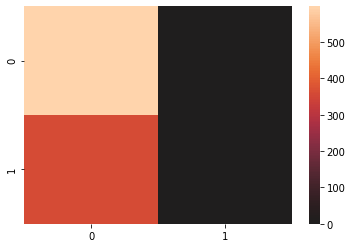

In [11]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, center=True)
plt.show()

Zwiększenie rozmiaru warsty ukrytej do 100x100x100 i porównianie wyników

Iteration 1, loss = 0.67603261
Iteration 2, loss = 0.66676676
Iteration 3, loss = 0.65715841
Iteration 4, loss = 0.64888090
Iteration 5, loss = 0.64130160
Iteration 6, loss = 0.63403916
Iteration 7, loss = 0.62670140
Iteration 8, loss = 0.61906727
Iteration 9, loss = 0.61087862
Iteration 10, loss = 0.60192768
0.6722338204592901
[[598   0]
 [314  46]]


/home/student/Pulpit/aied/aied/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


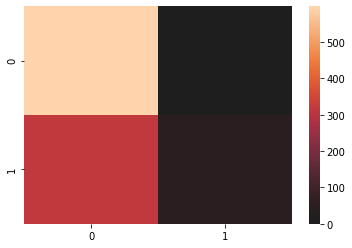

In [12]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=10, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, center=True)
plt.show()

Zwiększenie liczby iteracji do 50

Iteration 1, loss = 0.67603261
Iteration 2, loss = 0.66676676
Iteration 3, loss = 0.65715841
Iteration 4, loss = 0.64888090
Iteration 5, loss = 0.64130160
Iteration 6, loss = 0.63403916
Iteration 7, loss = 0.62670140
Iteration 8, loss = 0.61906727
Iteration 9, loss = 0.61087862
Iteration 10, loss = 0.60192768
Iteration 11, loss = 0.59208801
Iteration 12, loss = 0.58122524
Iteration 13, loss = 0.56904435
Iteration 14, loss = 0.55533275
Iteration 15, loss = 0.53990432
Iteration 16, loss = 0.52295015
Iteration 17, loss = 0.50409888
Iteration 18, loss = 0.48345015
Iteration 19, loss = 0.46120153
Iteration 20, loss = 0.43758420
Iteration 21, loss = 0.41307622
Iteration 22, loss = 0.38797234
Iteration 23, loss = 0.36291372
Iteration 24, loss = 0.33852636
Iteration 25, loss = 0.31532770
Iteration 26, loss = 0.29357716
Iteration 27, loss = 0.27336094
Iteration 28, loss = 0.25493516
Iteration 29, loss = 0.23807687
Iteration 30, loss = 0.22287037
Iteration 31, loss = 0.20912973
Iteration 32, los

/home/student/Pulpit/aied/aied/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


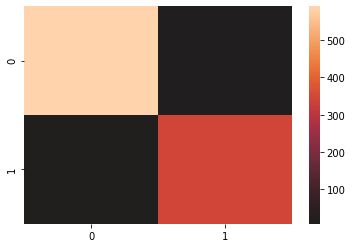

In [13]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, center=True)
plt.show()

Zwiększenie liczby iteracji do 100

Iteration 1, loss = 0.67603261
Iteration 2, loss = 0.66676676
Iteration 3, loss = 0.65715841
Iteration 4, loss = 0.64888090
Iteration 5, loss = 0.64130160
Iteration 6, loss = 0.63403916
Iteration 7, loss = 0.62670140
Iteration 8, loss = 0.61906727
Iteration 9, loss = 0.61087862
Iteration 10, loss = 0.60192768
Iteration 11, loss = 0.59208801
Iteration 12, loss = 0.58122524
Iteration 13, loss = 0.56904435
Iteration 14, loss = 0.55533275
Iteration 15, loss = 0.53990432
Iteration 16, loss = 0.52295015
Iteration 17, loss = 0.50409888
Iteration 18, loss = 0.48345015
Iteration 19, loss = 0.46120153
Iteration 20, loss = 0.43758420
Iteration 21, loss = 0.41307622
Iteration 22, loss = 0.38797234
Iteration 23, loss = 0.36291372
Iteration 24, loss = 0.33852636
Iteration 25, loss = 0.31532770
Iteration 26, loss = 0.29357716
Iteration 27, loss = 0.27336094
Iteration 28, loss = 0.25493516
Iteration 29, loss = 0.23807687
Iteration 30, loss = 0.22287037
Iteration 31, loss = 0.20912973
Iteration 32, los

/home/student/Pulpit/aied/aied/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


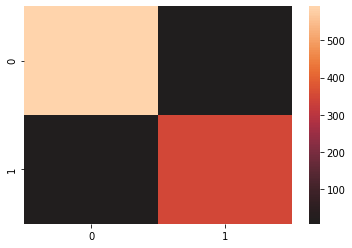

In [14]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=100, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, center=True)
plt.show()

Zwiększenie liczby iteracji do 500

Iteration 1, loss = 0.67603261
Iteration 2, loss = 0.66676676
Iteration 3, loss = 0.65715841
Iteration 4, loss = 0.64888090
Iteration 5, loss = 0.64130160
Iteration 6, loss = 0.63403916
Iteration 7, loss = 0.62670140
Iteration 8, loss = 0.61906727
Iteration 9, loss = 0.61087862
Iteration 10, loss = 0.60192768
Iteration 11, loss = 0.59208801
Iteration 12, loss = 0.58122524
Iteration 13, loss = 0.56904435
Iteration 14, loss = 0.55533275
Iteration 15, loss = 0.53990432
Iteration 16, loss = 0.52295015
Iteration 17, loss = 0.50409888
Iteration 18, loss = 0.48345015
Iteration 19, loss = 0.46120153
Iteration 20, loss = 0.43758420
Iteration 21, loss = 0.41307622
Iteration 22, loss = 0.38797234
Iteration 23, loss = 0.36291372
Iteration 24, loss = 0.33852636
Iteration 25, loss = 0.31532770
Iteration 26, loss = 0.29357716
Iteration 27, loss = 0.27336094
Iteration 28, loss = 0.25493516
Iteration 29, loss = 0.23807687
Iteration 30, loss = 0.22287037
Iteration 31, loss = 0.20912973
Iteration 32, los

Iteration 253, loss = 0.03194713
Iteration 254, loss = 0.03185772
Iteration 255, loss = 0.03177891
Iteration 256, loss = 0.03175082
Iteration 257, loss = 0.03158282
Iteration 258, loss = 0.03156701
Iteration 259, loss = 0.03147557
Iteration 260, loss = 0.03138422
Iteration 261, loss = 0.03128340
Iteration 262, loss = 0.03120019
Iteration 263, loss = 0.03111763
Iteration 264, loss = 0.03104008
Iteration 265, loss = 0.03101106
Iteration 266, loss = 0.03088830
Iteration 267, loss = 0.03077875
Iteration 268, loss = 0.03072963
Iteration 269, loss = 0.03070508
Iteration 270, loss = 0.03055037
Iteration 271, loss = 0.03044357
Iteration 272, loss = 0.03039948
Iteration 273, loss = 0.03029817
Iteration 274, loss = 0.03021434
Iteration 275, loss = 0.03015074
Iteration 276, loss = 0.03003172
Iteration 277, loss = 0.03001198
Iteration 278, loss = 0.02991803
Iteration 279, loss = 0.02978370
Iteration 280, loss = 0.02972248
Iteration 281, loss = 0.02968925
Iteration 282, loss = 0.02958712
Iteration 

/home/student/Pulpit/aied/aied/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


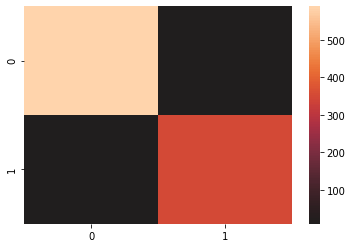

In [15]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, center=True)
plt.show()

### 5.4 SVM

Klasyfikacja na domyślnym kernelu.

Default kernel accuracy score:
0.9853862212943633
0.9853862212943633
[[594   4]
 [ 10 350]]


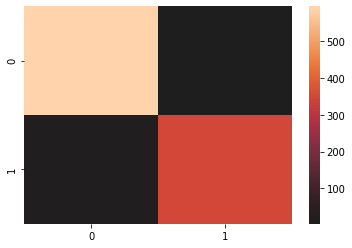

In [16]:
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Default kernel accuracy score:')
print(metrics.accuracy_score(y_test,y_pred))
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, center=True)
plt.show()

Klasyfikacja na domyślnym kernelu liniowym.

Default linear kernel Accuracy score:
0.9874739039665971
0.9874739039665971
[[595   3]
 [  9 351]]


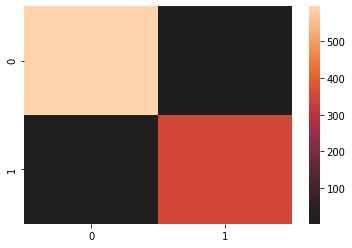

In [17]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Default linear kernel Accuracy score:')
print(metrics.accuracy_score(y_test,y_pred))
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, center=True)
plt.show()

Klasyfikacja na kernelu RBF.

Default RBF kernel accuracy score:
0.9853862212943633
0.9853862212943633
[[594   4]
 [ 10 350]]


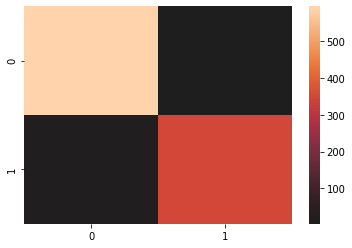

In [18]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Default RBF kernel accuracy score:')
print(metrics.accuracy_score(y_test,y_pred))
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, center=True)
plt.show()

Klasyfikacja na modelu wielomianowym.

Default polynomial accuracy score:
0.9613778705636743
0.9613778705636743
[[598   0]
 [ 37 323]]


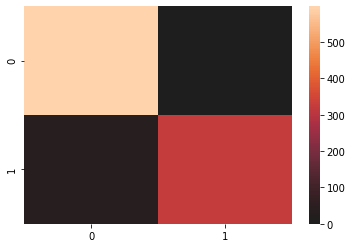

In [19]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Default polynomial accuracy score:')
print(metrics.accuracy_score(y_test,y_pred))
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, center=True)
plt.show()

## 6. Podsumowanie

Efektywność tesotwanych metod jest bardzo wysoka - średnia jakość to ok 98%. Klasyfikator SVM osiągał zauważalnie niższe wyniki, szczególnie na kernelu wielomianowym. Ręcznie utworzona sieć neuronowa oferowała nieznacznie wiekszą jakośc klasyfikacji w porównaniu do klasyfikatora MLP. 

Na jakość modelu sieci neuronowej wpływ miało zwiekszenie ilośći epok oraz ilości warstw Dense, zmiana funkcji aktywacji i dodawanie kolejnym wartstw nie wpływało na jakość modelu.

W przypadku klasyfikatora MLP zwiększenie ilości iteracji oraz rozmiaru warstwy ukrytej zwiększa jakość dostarczanych rozwiązań.

Dla klasyfikatora SVM najlepsze wyniki oferuje kernel RBF.